In [1]:
from torchvision import datasets
from torchvision.transforms import ToTensor
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_data = datasets.MNIST(root = "data", train = True, download= True, transform= ToTensor())

In [3]:
X_train = train_data.data.cpu().detach().numpy()
print(X_train.shape)
X_train = X_train.reshape(X_train.shape[0], -1) # shape (n, 784)
y = train_data.targets.cpu().detach().numpy() # shape (n, )

(60000, 28, 28)


In [5]:
# Take samples of class 2
import matplotlib.pyplot as plt
X = X_train[y == 8]
X = X.astype(float)
print(X.shape)

(5851, 784)


In [6]:
x= X[0]
np.sum(x / 255)

np.float64(106.29803921568626)

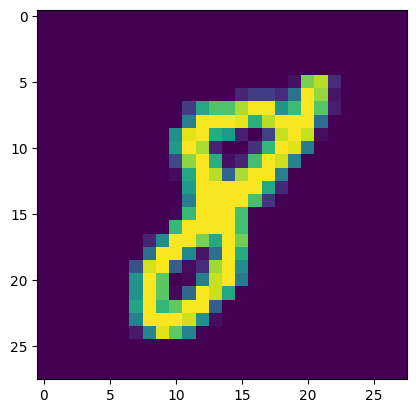

In [7]:
plt.imshow(x.reshape(28, 28))

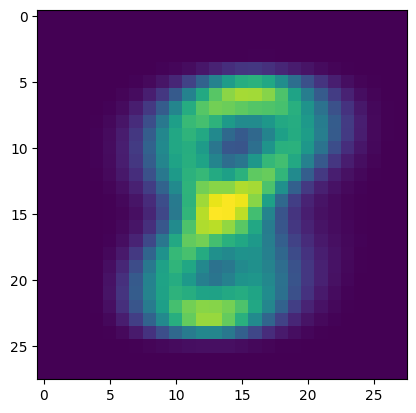

In [9]:
vmu = np.mean(X[:4000], axis = 0)
plt.imshow(vmu.reshape(28, 28))

# Generate examples of GAN vs Gaussian data

In [14]:
import numpy as np
from dataset import *
import matplotlib.pyplot as plt
plt.rcParams.update({"text.usetex": True,"font.family": "STIXGeneral"})#,"font.sans-serif": "Helvetica",})

## Gaussian with covariance estimation

In [92]:
# Gaussian data
m = 2000
m_estim = 0
n = 6000
estimate_cov = True
train_gauss = MNIST_generator(n, m, 'cpu', True, m_estim = m_estim, estimate_cov=estimate_cov, supervision= False)

(5923, 784)
(2000, 784)
(6742, 784)
(2000, 784)
(5958, 784)
(2000, 784)
(6131, 784)
(2000, 784)
(5842, 784)
(2000, 784)
(5421, 784)
(2000, 784)
(5918, 784)
(2000, 784)
(6265, 784)
(2000, 784)
(5851, 784)
(2000, 784)
(5949, 784)
(2000, 784)


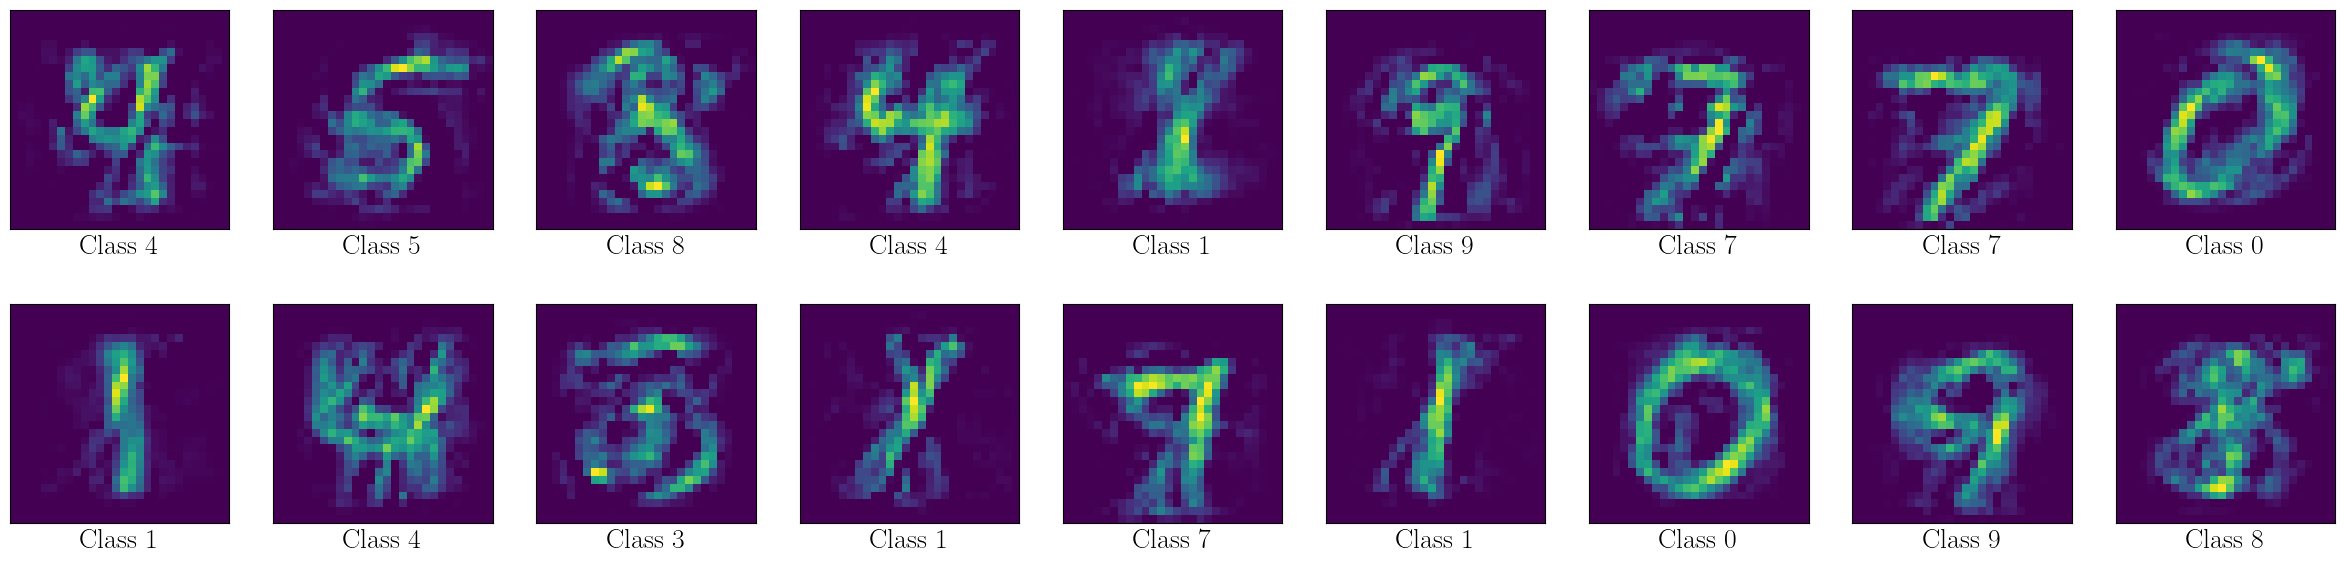

In [30]:
X_s = train_gauss.X_s
idx = np.random.randint(0, len(X_s), (2, 9))
fig, ax = plt.subplots(2, 9, figsize = (30, 7))
y_s = train_gauss.y_s
l, c = idx.shape
for i in range(l):
    for j in range(c):
        im = X_s[idx[i, j]]
        #im = np.maximum(im, 0)
        ax[i, j].imshow(im.reshape(28, 28))
        ax[i, j].set_xlabel(f'Class {y_s[idx[i, j]]}', fontsize = 20)
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])

#path = f'./study-plot/generated-gaussian-mnist-m-{m}-m_estim-{m_estim}-estim_cov-{estimate_cov}.pdf'
#fig.savefig(path, bbox_inches='tight')

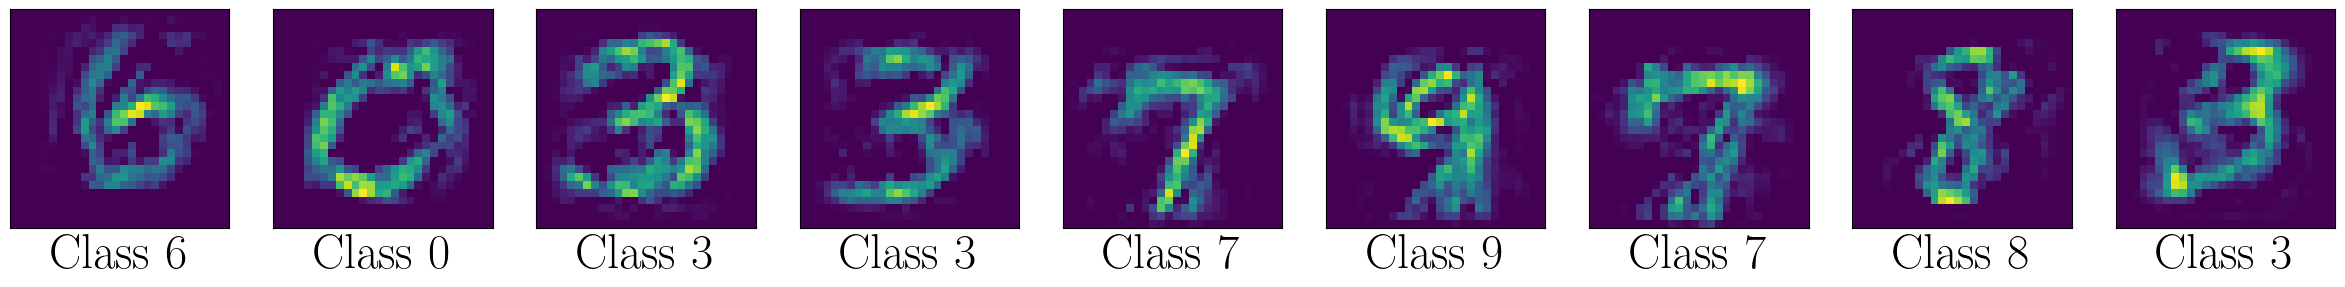

In [126]:
X_s = train_gauss.X_s
idx = np.random.randint(0, len(X_s), (9, ))
fig, ax = plt.subplots(1, 9, figsize = (30, 7))
y_s = train_gauss.y_s

for i in range(len(idx)):
    im = X_s[idx[i]]
    im = np.maximum(im, 0)
    ax[i].imshow(im.reshape(28, 28))
    ax[i].set_xlabel(f'Class {y_s[idx[i]]}', fontsize = 35)
    ax[i].set_xticks([])
    ax[i].set_yticks([])

#path = f'./study-plot/generated-gaussian-mnist-m-{m}-m_estim-{m_estim}-estim_cov-{estimate_cov}-one-row.pdf'
#fig.savefig(path, bbox_inches='tight')

In [127]:
path = f'./study-plot/generated-gaussian-mnist-m-{m}-m_estim-{m_estim}-estim_cov-{estimate_cov}-one-row.pdf'
fig.savefig(path, bbox_inches='tight')

## Gaussian without covaraince estimation

In [70]:
# Gaussian data
m = 2000
m_estim = 0
estimate_cov = False
train_gauss = MNIST_generator(6000, m, 'cpu', True, m_estim = m_estim, estimate_cov=estimate_cov, supervision= False)

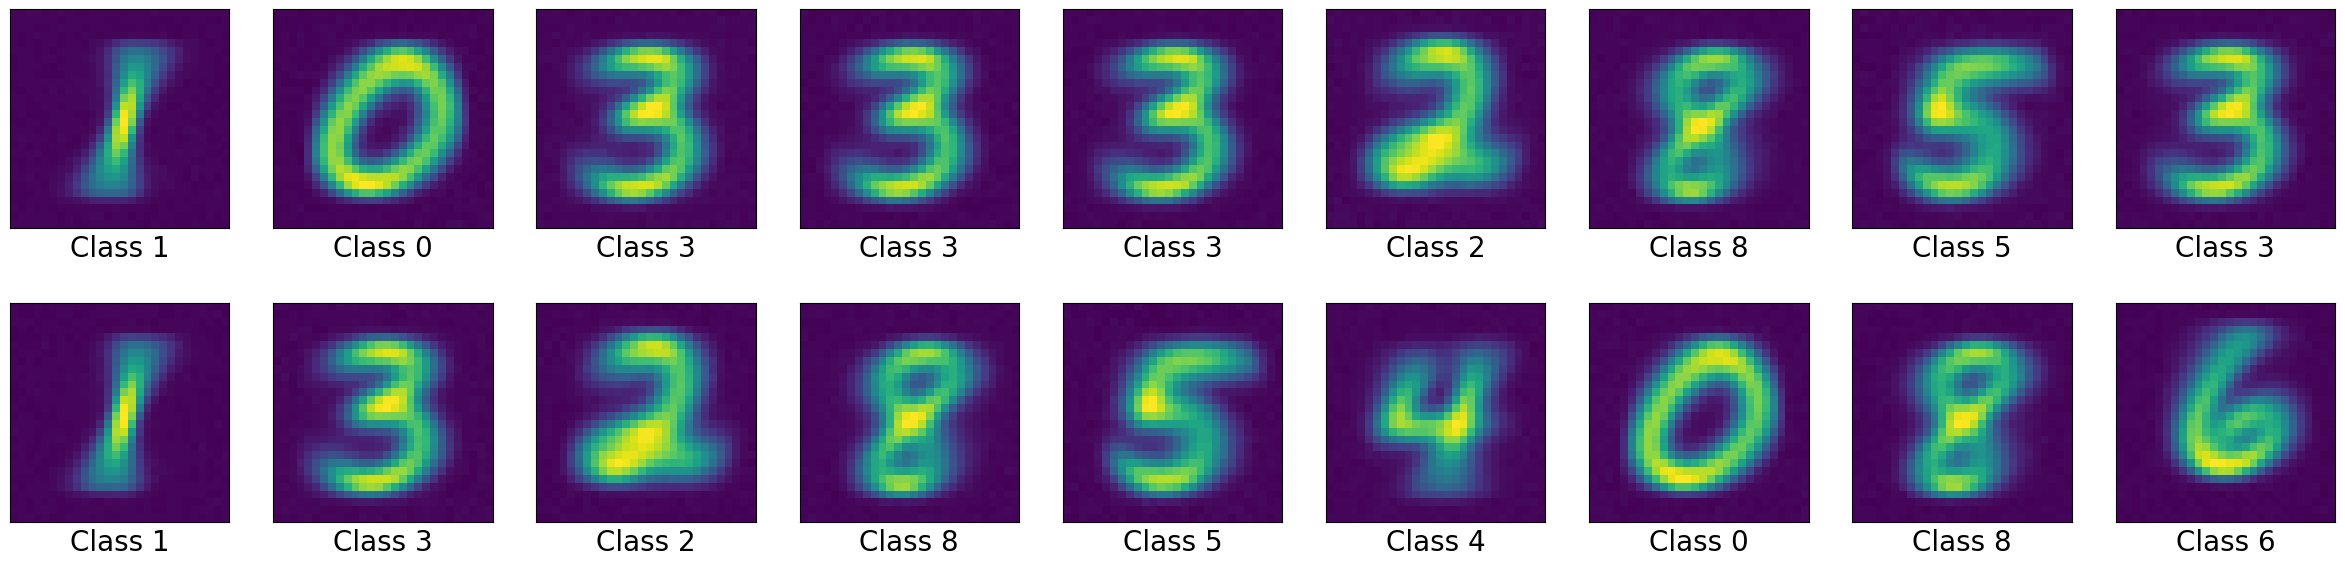

In [12]:
X_s = train_gauss.X_s
idx = np.random.randint(0, len(X_s), (2, 9))
fig, ax = plt.subplots(2, 9, figsize = (30, 7))
y_s = train_gauss.y_s
l, c = idx.shape
for i in range(l):
    for j in range(c):
        im = X_s[idx[i, j]]
        #im = np.maximum(im, 0)
        ax[i, j].imshow(im.reshape(28, 28))
        ax[i, j].set_xlabel(f'Class {y_s[idx[i, j]]}', fontsize = 20)
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])

#path = f'./study-plot/generated-gaussian-mnist-m-{m}-m_estim-{m_estim}-estim_cov-{estimate_cov}.pdf'
#fig.savefig(path, bbox_inches='tight')

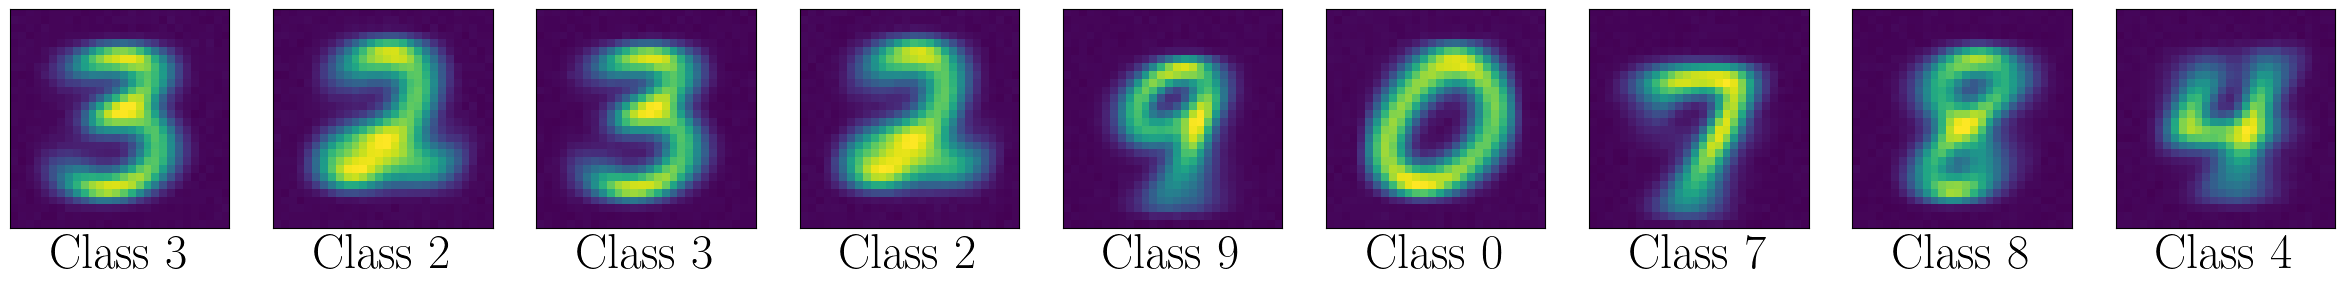

In [71]:
X_s = train_gauss.X_s
idx = np.random.randint(0, len(X_s), (9, ))
fig, ax = plt.subplots(1, 9, figsize = (30, 7))
y_s = train_gauss.y_s

for i in range(len(idx)):
    im = X_s[idx[i]]
    #im = np.maximum(im, 0)
    ax[i].imshow(im.reshape(28, 28))
    ax[i].set_xlabel(f'Class {y_s[idx[i]]}', fontsize = 35)
    ax[i].set_xticks([])
    ax[i].set_yticks([])

path = f'./study-plot/generated-gaussian-mnist-m-{m}-m_estim-{m_estim}-estim_cov-{estimate_cov}.pdf'
fig.savefig(path, bbox_inches='tight')

In [7]:
idx.shape

(9,)

## Gaussian by taking fewer samples to estimate the statistics

In [3]:
# Gaussian data
m = 100
m_estim = 0
n = 50
estimate_cov = True
train_gauss = MNIST_generator(n, m, 'cpu', True, m_estim, estimate_cov, supervision= False)

(50, 784)
(50, 784)


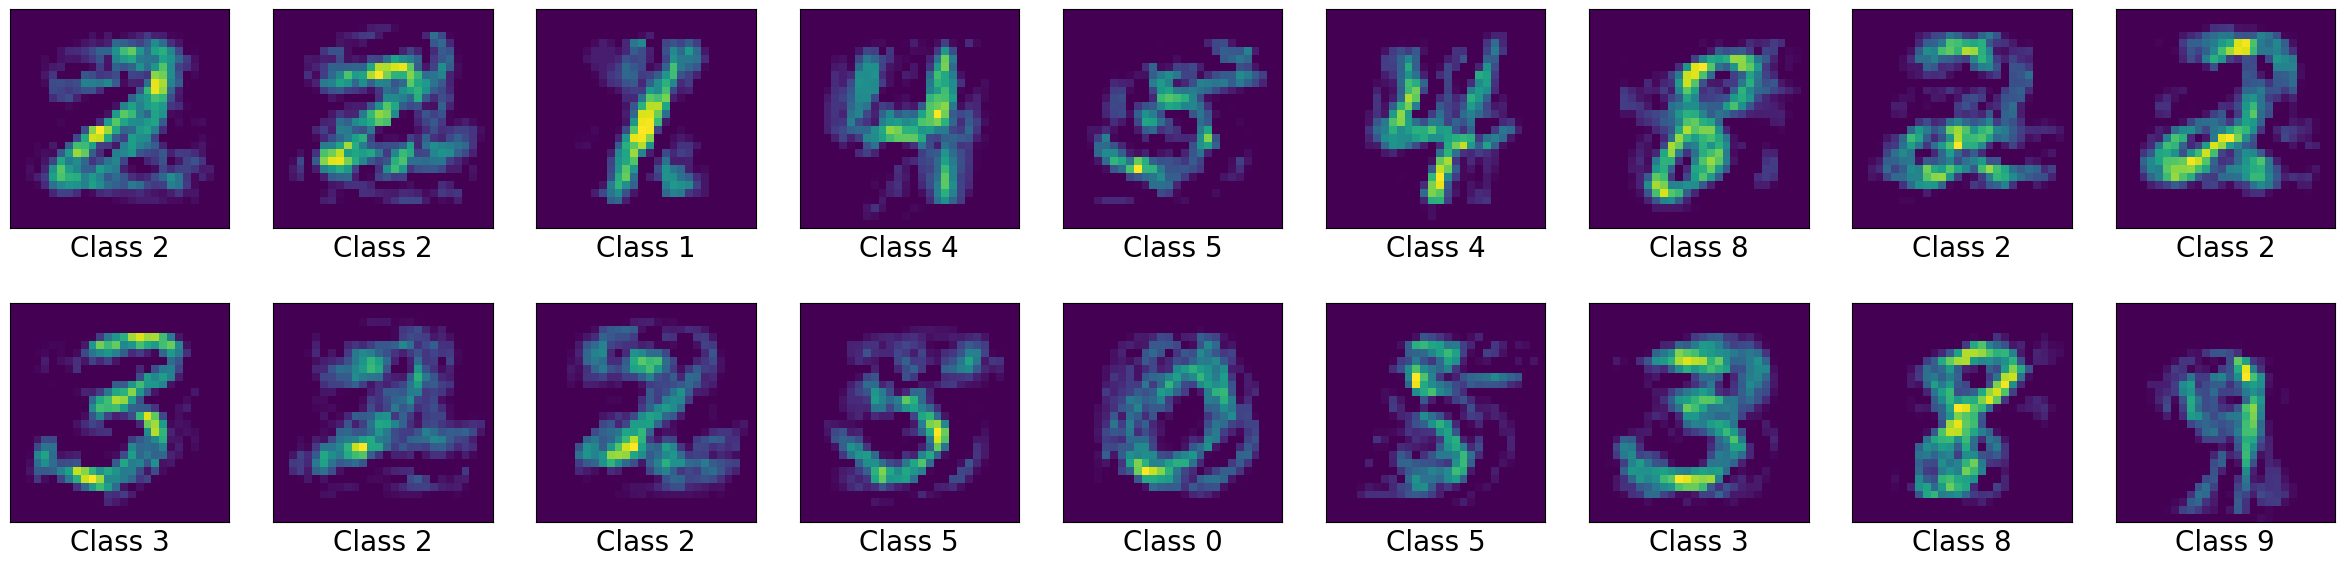

In [4]:
X_s = train_gauss.X_s
idx = np.random.randint(0, len(X_s), (2, 9))
fig, ax = plt.subplots(2, 9, figsize = (30, 7))
y_s = train_gauss.y_s
l, c = idx.shape
for i in range(l):
    for j in range(c):
        im = X_s[idx[i, j]]
        #im = np.maximum(im, 0)
        ax[i, j].imshow(im.reshape(28, 28))
        ax[i, j].set_xlabel(f'Class {y_s[idx[i, j]]}', fontsize = 20)
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])

#path = f'./study-plot/generated-gaussian-mnist-m-{m}-m_estim-{m_estim}-estim_cov-{estimate_cov}.pdf'
#fig.savefig(path, bbox_inches='tight')

## Statistics estimation of class 0 using different n

In [1]:
from torchvision import datasets
import numpy as np
import torch
from torchvision.transforms import ToTensor

# Statistics using all the samples
data = datasets.MNIST(root = "data", train = True, download= True, transform= ToTensor())

X = data.data.cpu().detach().numpy() # (N, 28, 28)
X = X.reshape(-1 , 784)
y = data.targets.cpu().detach().numpy()


In [2]:
cl = 0
X_r = X[y == cl]
N = X_r.shape[0]
print(N)
y_r = cl * np.ones(N)

5923


In [3]:
vmu = np.mean(X_r, axis = 0)
cov = (X_r - vmu).T @ (X_r  - vmu)/ N
mu = np.linalg.norm(vmu)

In [6]:
# Let's plot the distance between covariance matrices with n: it should be non-increasing with n !
from utils import *
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
plt.rcParams.update({"text.usetex": True,"font.family": "STIXGeneral"})#,"font.sans-serif": "Helvetica",})

ns = np.arange(1, 100) * 50
betas = []
dists = []
for n in tqdm(ns):
    x = X_r[:n]
    vmu_beta = np.mean(x, axis = 0)
    cov_hat = (x - vmu_beta).T @ (x - vmu_beta) / n
    beta = np.sum(vmu * vmu_beta) / mu**2
    beta = min(beta, 2 - beta)
    betas.append(beta)
    #dists.append(cov_dist(cov, cov_hat))
    dists.append(np.linalg.norm(cov_hat - cov))


100%|██████████| 99/99 [00:02<00:00, 48.82it/s] 


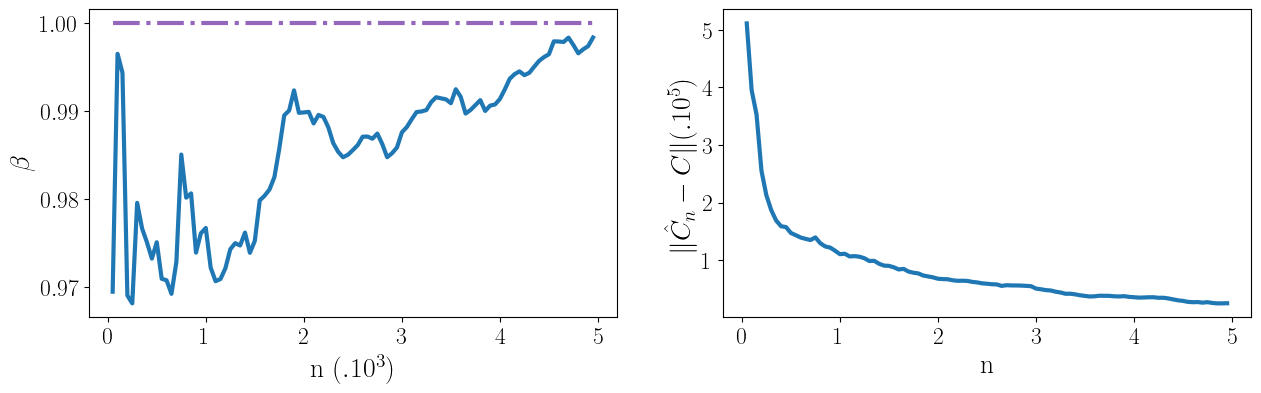

In [13]:
fig, ax = plt.subplots(1, 2, figsize = (15, 4))
linewidth = 3
fontsize = 20
labelsize = 17

ax[0].plot(ns /1000, betas, linewidth = linewidth)
ax[0].plot([ns[0] / 1000, ns[-1] / 1000], [1, 1], linewidth = linewidth, color = 'tab:purple', linestyle = '-.')
ax[0].set_xlabel('n ($. 10^3$)', fontsize = fontsize)
ax[0].set_ylabel('$\\beta$', fontsize = fontsize)
ax[0].tick_params(axis = 'x', which = 'both', labelsize = labelsize)
ax[0].tick_params(axis = 'y', which = 'both', labelsize = labelsize)


ax[1].plot(ns /1000, np.array(dists) / 10**5, linewidth = linewidth)
ax[1].set_xlabel('n', fontsize = fontsize)
ax[1].set_ylabel('$\| \hat{C}_n - C \| (.10^5) $', fontsize = fontsize)
ax[1].tick_params(axis = 'x', which = 'both', labelsize = labelsize)
ax[1].tick_params(axis = 'y', which = 'both', labelsize = labelsize)

path = f'./study-plot/MNIST-statistics-variation-with-n.pdf'
fig.savefig(path, bbox_inches='tight')

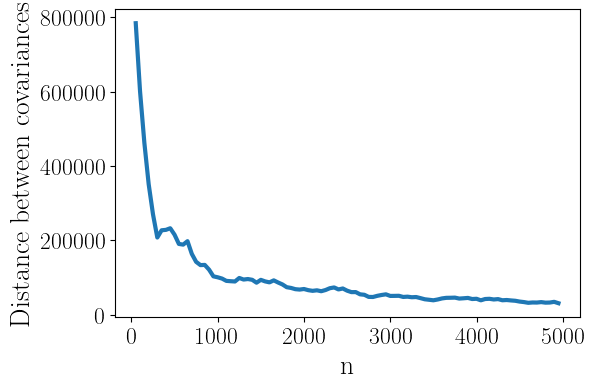

In [5]:
fig, ax = plt.subplots(figsize = (6, 4))
ax.plot(ns, dists, linewidth = linewidth)
ax.set_xlabel('n', fontsize = fontsize)
ax.set_ylabel('Distance between covariances', fontsize = fontsize)
ax.tick_params(axis = 'x', which = 'both', labelsize = labelsize)
ax.tick_params(axis = 'y', which = 'both', labelsize = labelsize)


## MNIST plot with label noise

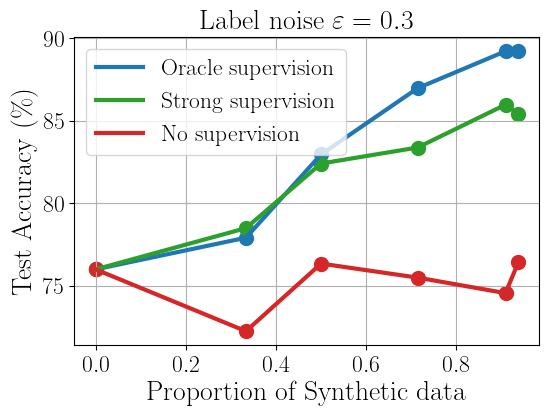

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams.update({"text.usetex": True,"font.family": "STIXGeneral"})#,"font.sans-serif": "Helvetica",})

n = 50
epsilon = 0.3
df = pd.read_csv('results_mnist_n-50-gaussian-supervision-False-epsilon-0.3-rho-0-phi-1.csv')
ms = df['m'].to_numpy()
pis = ms / (n + ms)
# Test accuracy evolution
test_accs = df['Test Accuracy']

fig, ax = plt.subplots(figsize = (6, 4))
linewidth = 3
fontsize = 20
labelsize = 17
s = 100

# Oracle supervision
ax.plot(pis, test_accs, color = 'tab:blue', linewidth = linewidth, label = 'Oracle supervision')
ax.scatter(pis, test_accs, marker = 'o', color = 'tab:blue', s = s, alpha = 1)

# Strong supervision
df = pd.read_csv('results_mnist_n-50-gaussian-supervision-False-epsilon-0.3-rho-0.1-phi-0.9.csv')
test_accs = df['Test Accuracy']

# Test Accuracy
ax.plot(pis, test_accs, color = 'tab:green', linewidth = linewidth, label = 'Strong supervision')
ax.scatter(pis, test_accs, marker = 'o', color = 'tab:green', s = s, alpha = 1)


# No supervision
df = pd.read_csv('results_mnist_n-50-gaussian-supervision-False-epsilon-0.3-rho-1-phi-1.csv')
test_accs = df['Test Accuracy']

ax.plot(pis, test_accs, color = 'tab:red', linewidth = linewidth, label = 'No supervision' )
ax.scatter(pis, test_accs, marker = 'o', color = 'tab:red', s = s, alpha = 1)
ax.tick_params(axis = 'x', which = 'both', labelsize = labelsize)
ax.tick_params(axis = 'y', which = 'both', labelsize = labelsize)
ax.set_ylabel('Test Accuracy (\%)', fontsize = fontsize)
ax.set_xlabel('Proportion of Synthetic data', fontsize = fontsize)
ax.grid()
ax.legend(fontsize = labelsize)
ax.set_title(f'Label noise $\\varepsilon = {epsilon}$', fontsize = fontsize)
#plt.title('MNIST Training with Mixture of Real + Synthetic data', loc = 'center')
path = './study-plot' + f'/MNIST-Gaussian-NN-ReLU-n-{n}-epsilon-{0.3}.pdf'
fig.savefig(path, bbox_inches='tight')

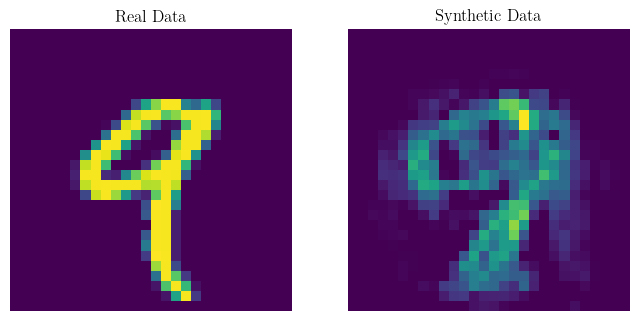

In [6]:
plt.rcParams.update({"text.usetex": True,"font.family": "STIXGeneral"})#,"font.sans-serif": "Helvetica",})

X_s = data.X_s
X_real = data.X_real
img_r = X_real[data.y_real == 9][0]
img_s = X_s[data.y_s == 9][0]
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

titles = ["Real Data", "Synthetic Data"]
# Display images
axes[0].imshow(img_r.reshape(28, 28))
axes[1].imshow(img_s.reshape(28, 28))

# Set titles
for ax, title in zip(axes, titles):
    ax.set_title(title)
    ax.axis("off")  # Hide axes for a cleaner look

# Show the plot
path = f'./study-plot/real_synth_mnist.png'
fig.savefig(path, bbox_inches='tight')

#path = f'./study-plot/generated-gaussian-mnist-m-{m}-m_estim-{m_estim}-estim_cov-{estimate_cov}.pdf'
#fig.savefig(path, bbox_inches='tight')

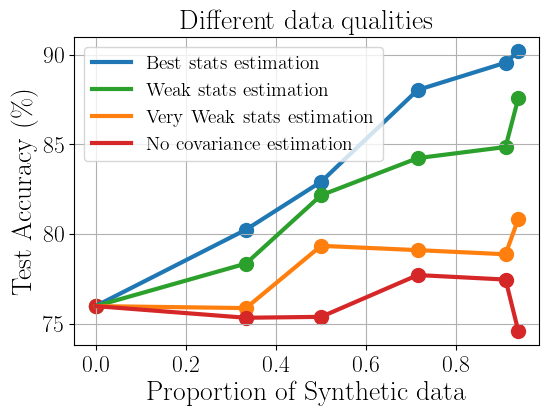

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams.update({"text.usetex": True,"font.family": "STIXGeneral"})#,"font.sans-serif": "Helvetica",})

n = 50
epsilon = 0.3
df = pd.read_csv('results_mnist_n-50-gaussian-supervision-False.csv')
ms = df['m'].to_numpy()
pis = ms / (n + ms)
# Test accuracy evolution
test_accs = df['Test Accuracy']

fig, ax = plt.subplots(figsize = (6, 4))
linewidth = 3
fontsize = 20
labelsize = 17
s = 100

# Best estimation
ax.plot(pis, test_accs, color = 'tab:blue', linewidth = linewidth, label = 'Best stats estimation')
ax.scatter(pis, test_accs, marker = 'o', color = 'tab:blue', s = s, alpha = 1)

# Good estimation
df = pd.read_csv('results_mnist_n-50-gaussian-n_use-100.csv')
test_accs = df['Test Accuracy']

# Test Accuracy
ax.plot(pis, test_accs, color = 'tab:green', linewidth = linewidth, label = 'Weak stats estimation')
ax.scatter(pis, test_accs, marker = 'o', color = 'tab:green', s = s, alpha = 1)

# Weak estimation
df = pd.read_csv('results_mnist_n-50-gaussian-n_use-10.csv')
test_accs = df['Test Accuracy']

# Test Accuracy
ax.plot(pis, test_accs, color = 'tab:orange', linewidth = linewidth, label = 'Very Weak stats estimation')
ax.scatter(pis, test_accs, marker = 'o', color = 'tab:orange', s = s, alpha = 1)

# No covariance estimation
df = pd.read_csv('results_mnist_n-50-gaussian-estimate_cov-False.csv')
test_accs = df['Test Accuracy']

ax.plot(pis, test_accs, color = 'tab:red', linewidth = linewidth, label = 'No covariance estimation' )
ax.scatter(pis, test_accs, marker = 'o', color = 'tab:red', s = s, alpha = 1)

ax.tick_params(axis = 'x', which = 'both', labelsize = labelsize)
ax.tick_params(axis = 'y', which = 'both', labelsize = labelsize)
ax.set_ylabel('Test Accuracy (\%)', fontsize = fontsize)
ax.set_xlabel('Proportion of Synthetic data', fontsize = fontsize)
ax.grid()
ax.legend(fontsize = labelsize -3)
ax.set_title(f'Different data qualities', fontsize = fontsize)
#plt.title('MNIST Training with Mixture of Real + Synthetic data', loc = 'center')
path = './study-plot' + f'/MNIST-Gaussian-NN-ReLU-n-{n}-n_use-variable.pdf'
fig.savefig(path, bbox_inches='tight')

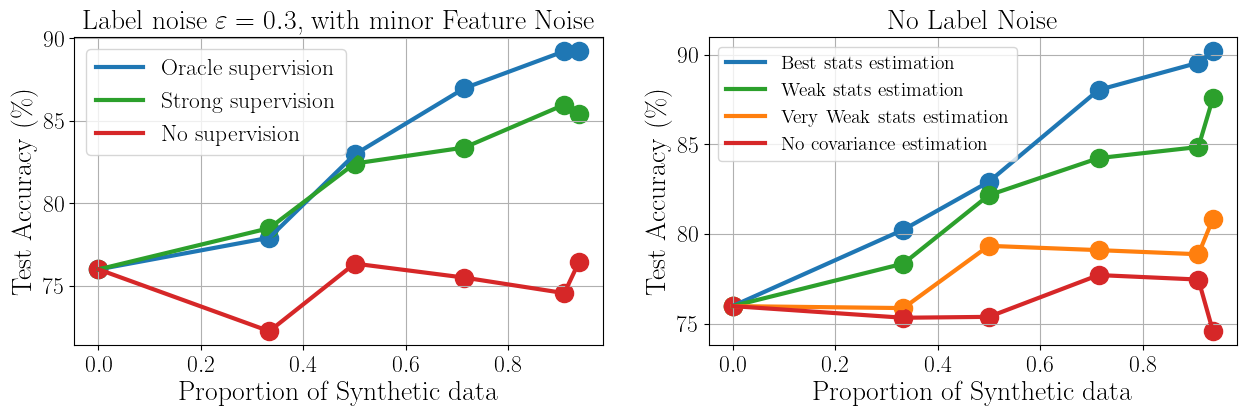

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams.update({"text.usetex": True,"font.family": "STIXGeneral"})#,"font.sans-serif": "Helvetica",})

n = 50
epsilon = 0.3
df = pd.read_csv('./results-data/results_mnist_n-50-gaussian-supervision-False-epsilon-0.3-rho-0-phi-1.csv')
ms = df['m'].to_numpy()
pis = ms / (n + ms)
# Test accuracy evolution
test_accs = df['Test Accuracy']

fig, ax = plt.subplots(1, 2, figsize = (15, 4))
linewidth = 3
fontsize = 20
labelsize = 17
s = 170

# Label Noise plots
# Oracle supervision
ax[0].plot(pis, test_accs, color = 'tab:blue', linewidth = linewidth, label = 'Oracle supervision')
ax[0].scatter(pis, test_accs, marker = 'o', color = 'tab:blue', s = s, alpha = 1)

# Strong supervision
df = pd.read_csv('./results-data/results_mnist_n-50-gaussian-supervision-False-epsilon-0.3-rho-0.1-phi-0.9.csv')
test_accs = df['Test Accuracy']

# Test Accuracy
ax[0].plot(pis, test_accs, color = 'tab:green', linewidth = linewidth, label = 'Strong supervision')
ax[0].scatter(pis, test_accs, marker = 'o', color = 'tab:green', s = s, alpha = 1)


# No supervision
df = pd.read_csv('./results-data/results_mnist_n-50-gaussian-supervision-False-epsilon-0.3-rho-1-phi-1.csv')
test_accs = df['Test Accuracy']

ax[0].plot(pis, test_accs, color = 'tab:red', linewidth = linewidth, label = 'No supervision' )
ax[0].scatter(pis, test_accs, marker = 'o', color = 'tab:red', s = s, alpha = 1)
ax[0].tick_params(axis = 'x', which = 'both', labelsize = labelsize)
ax[0].tick_params(axis = 'y', which = 'both', labelsize = labelsize)
ax[0].set_ylabel('Test Accuracy (\%)', fontsize = fontsize)
ax[0].set_xlabel('Proportion of Synthetic data', fontsize = fontsize)
ax[0].grid()
ax[0].legend(fontsize = labelsize)
ax[0].set_title(f'Label noise $\\varepsilon = {epsilon}$, with minor Feature Noise', fontsize = fontsize)
#plt.title('MNIST Training with Mixture of Real + Synthetic data', loc = 'center')

# Best estimation
df = pd.read_csv('./results-data/results_mnist_n-50-gaussian-supervision-False.csv')
test_accs = df['Test Accuracy']
ax[1].plot(pis, test_accs, color = 'tab:blue', linewidth = linewidth, label = 'Best stats estimation')
ax[1].scatter(pis, test_accs, marker = 'o', color = 'tab:blue', s = s, alpha = 1)

# Good estimation
df = pd.read_csv('./results-data/results_mnist_n-50-gaussian-n_use-100.csv')
test_accs = df['Test Accuracy']

# Test Accuracy
ax[1].plot(pis, test_accs, color = 'tab:green', linewidth = linewidth, label = 'Weak stats estimation')
ax[1].scatter(pis, test_accs, marker = 'o', color = 'tab:green', s = s, alpha = 1)

# Weak estimation
df = pd.read_csv('./results-data/results_mnist_n-50-gaussian-n_use-10.csv')
test_accs = df['Test Accuracy']

# Test Accuracy
ax[1].plot(pis, test_accs, color = 'tab:orange', linewidth = linewidth, label = 'Very Weak stats estimation')
ax[1].scatter(pis, test_accs, marker = 'o', color = 'tab:orange', s = s, alpha = 1)

# No covariance estimation
df = pd.read_csv('./results-data/results_mnist_n-50-gaussian-estimate_cov-False.csv')
test_accs = df['Test Accuracy']

ax[1].plot(pis, test_accs, color = 'tab:red', linewidth = linewidth, label = 'No covariance estimation' )
ax[1].scatter(pis, test_accs, marker = 'o', color = 'tab:red', s = s, alpha = 1)

ax[1].tick_params(axis = 'x', which = 'both', labelsize = labelsize)
ax[1].tick_params(axis = 'y', which = 'both', labelsize = labelsize)
ax[1].set_ylabel('Test Accuracy (\%)', fontsize = fontsize)
ax[1].set_xlabel('Proportion of Synthetic data', fontsize = fontsize)
ax[1].grid()
ax[1].legend(fontsize = labelsize -3)
ax[1].set_title(f'No Label Noise', fontsize = fontsize)
#plt.title('MNIST Training with Mixture of Real + Synthetic data', loc = 'center')
path = './study-plot' + f'/MNIST-Gaussian-NN-ReLU-n-{n}-global.pdf'
fig.savefig(path, bbox_inches='tight')